## Compito di esame

Data la funzione

$$f(x)=\frac{sin^2(x+7/2)\cdot exp(1/5-2\cdot x)}{log(x+5)}$$

Scrivere lo script python  in cui

-  a) si disegni in figura 1 il grafico di f e si dica quanti zeri reali ha la funzione nel dominio [−2, 4];
                                                 Punti: 2
-  b) si utilizzi il metodo di Newton per determinare le radici dell’equazione f(x) = 0 con iterati iniziali x0 = −1 e x0 = 4, assumendo come tolleranza per il test d’arresto sull’incremento tolx = 1.e − 15 e come tolleranza per il test del residuo tolf = 1.e − 15; 
                                                                                                        Punti: 5

-  c) si disegni in figura 2 l’andamento deegli iterati ottenute a partire dai valori di innesco x0 = −1 e x0 = 4;
                                                                                                       Punti: 2

- d) si calcoli, nei due casi implementati al punto b), una stima dell’ordine di convergenza del metodo;
                                                 Punti: 3
- e) qualora l’ordine di convergenza non risulti ottimale, si modifichi opportunamente il metodo di Newton per renderlo tale (motivando la modifica implementata). 
                                                Punti: 4


In [26]:
import math
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt


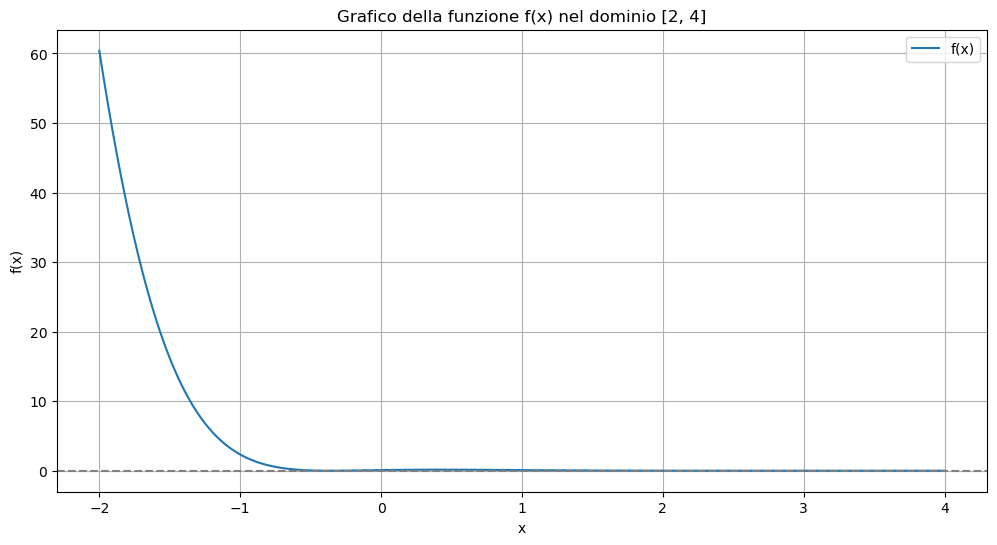

Soluzione per x0 = -1 è -0.3584073606973445
Iterazioni = 27
Lista iterati = [-0.7941384267080851, -0.6393701684816213, -0.5293083592518808, -0.4565169682693565, -0.4120039041841199, -0.3866381053191921, -0.37293340418617205, -0.36578109568149586, -0.3621230262712238, -0.3602725367962445, -0.35934179843198666, -0.3588750390671854, -0.35864130970743907, -0.35852435733955995, -0.358465859199896, -0.3584366046369087, -0.3584219759815976, -0.35841466131042155, -0.3584110038889453, -0.3584091751567339, -0.3584082607852598, -0.3584078035981806, -0.35840757500430553, -0.3584074607072841, -0.35840740355875245, -0.3584073749844814, -0.3584073606973445]
Soluzione per x0 = 4 è 5.924767126784058
Iterazioni = 20
Lista iterati = [4.762500625902008, 5.106060784254868, 5.361570020709316, 5.553556365108507, 5.692870097850675, 5.7880318886992805, 5.848369742358047, 5.883877446915109, 5.903519815188005, 5.9139250145034135, 5.919292330599942, 5.9220199238692, 5.923395080449646, 5.924085547935698, 5.9244315

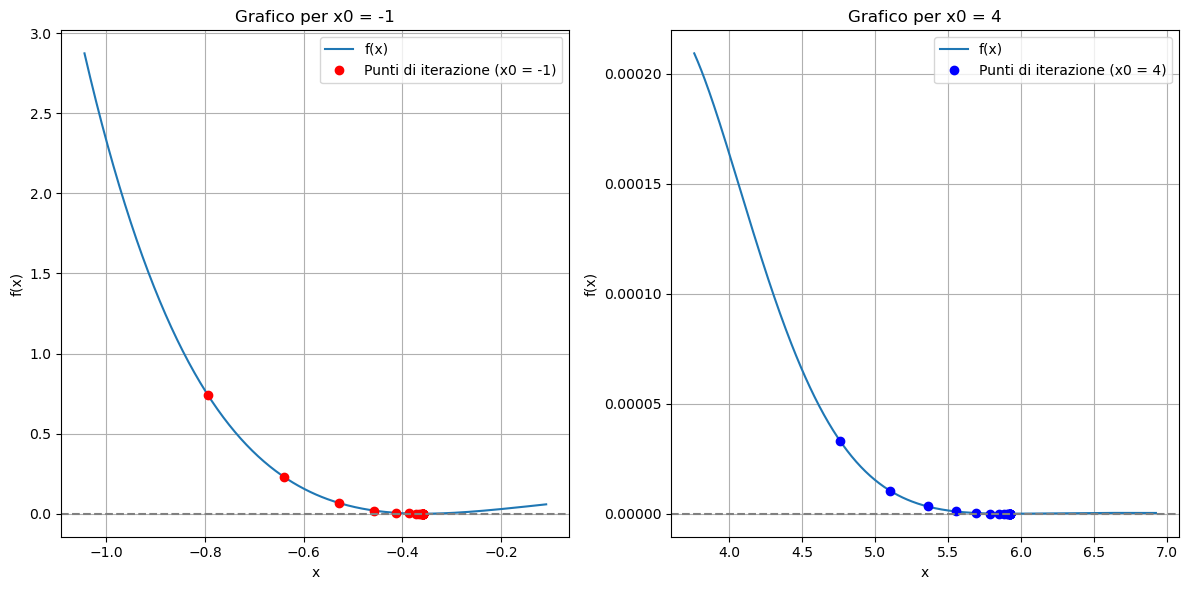

Ordine stimato per x0 = -1 : 1.0000001303265151 

Ordine stimato per x0 = 4 : 1.0000955463343955 

Molteplicità per x0 = -1 è 2
Molteplicità per x0 = 4 è 2
Soluzione per x0 usando newton_mod = -1 è -0.35840734642494904
Iterazioni = 5
Lista iterati = [-0.5882768534161702, -0.40135247738715046, -0.36027201390079466, -0.3584110579884457, -0.35840734642494904]
Soluzione per x0 usando newton_mod= 4 è 5.924777951443416
Iterazioni = 5
Lista iterati = [5.5250012518040155, 5.820258357299381, 5.9150260245913255, 5.924682294774475, 5.924777951443416]
Ordine stimato per x0 con newton_mod = -1 : 2.009212512673741 

Ordine stimato per x0 con newton_mod = 4 : 2.020560141118757 



In [41]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

# Definire la variabile simbolica e l'espressione della funzione
x = sym.symbols('x')
sym_f = ((sym.sin(x + (7/2))**2) * sym.exp((1/5) - (2 * x))) / sym.log(x + 5)
sym_df = sym.diff(sym_f, x, 1)

# Convertire l'espressione simbolica in una funzione numerica
fname = sym.lambdify(x, sym_f, modules='numpy')
fpname = sym.lambdify(x, sym_df, modules='numpy')



# Tracciare il grafico della funzione nel dominio [2, 4]
x_values_initial = np.linspace(-2, 4, 600)
y_values_initial = fname(x_values_initial)

plt.figure(figsize=(12, 6))

# Grafico della funzione nel dominio [2, 4]
plt.subplot(1, 1, 1)
plt.plot(x_values_initial, y_values_initial, label='f(x)')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Grafico della funzione f(x) nel dominio [2, 4]')
plt.legend()
plt.grid(True)
plt.show()

def newton(fname, fpname, x0, tolx=1e-15, tolf=1e-15, nmax=1000):
    xk = []
    fx0 = fname(x0)
    if abs(fpname(x0)) <= np.spacing(1):  # Se la derivata prima è piccola, stop
        print("Derivata prima nulla in x0")
        return None, None, None
    
    d = fx0 / fpname(x0)
    x1 = x0 - d
    fx1 = fname(x1)
    xk.append(x1)
    it = 1
    
    while it < nmax and abs(fx1) >= tolf and abs(d) >= tolx * abs(x1):
        x0 = x1
        fx0 = fname(x0)
        if abs(fpname(x0)) <= np.spacing(1):  # Se la derivata prima è piccola, stop
            print("Derivata prima nulla in x0")
            return None, None, None
        d = fx0 / fpname(x0)
        x1 = x0 - d
        fx1 = fname(x1)
        it += 1
        xk.append(x1)
    
    if it == nmax:
        print('Raggiunto massimo numero di iterazioni\n')
    
    return x1, it, xk

#                             | molteplicità della radice

def newton_mod(fname, fpname, m, x0, tolx=1e-15, tolf=1e-15, nmax=1000):
    xk = []
    fx0 = fname(x0)
    if abs(fpname(x0)) <= np.spacing(1):  # Se la derivata prima è piccola, stop
        print("Derivata prima nulla in x0")
        return None, None, None
    
    d = fx0 / fpname(x0)
    x1 = x0 - m*d
    fx1 = fname(x1)
    xk.append(x1)
    it = 1
    
    while it < nmax and abs(fx1) >= tolf and abs(d) >= tolx * abs(x1):
        x0 = x1
        fx0 = fname(x0)
        if abs(fpname(x0)) <= np.spacing(1):  # Se la derivata prima è piccola, stop
            print("Derivata prima nulla in x0")
            return None, None, None
        d = fx0 / fpname(x0)
        x1 = x0 - m*d
        fx1 = fname(x1)
        it += 1
        xk.append(x1)
    
    if it == nmax:
        print('Raggiunto massimo numero di iterazioni\n')
    
    return x1, it, xk

def stima_ordine(xk, iterazioni):
    # Vedi dispensa allegata per la spiegazione
    if iterazioni < 5:
        return None  # Non ci sono abbastanza iterazioni per stimare l'ordine
    k = iterazioni - 4
    p = np.log(abs(xk[k+2] - xk[k+3]) / abs(xk[k+1] - xk[k+2])) / 
    np.log(abs(xk[k+1] - xk[k+2]) / abs(xk[k] - xk[k+1]))
    return p

def calcola_molteplicità(f, x0, tol=1e-15):
    # Funzione simbolica e le sue derivate
    derivata = f
    k = 0
    while derivata.subs(x, x0) <=  tol:
        k += 1
        derivata = sym.diff(derivata, x)
    return k

# Punto iniziale 1
x0_1 = -1
x1_1, it_1, xk_1 = newton(fname, fpname, x0_1)
print("Soluzione per x0 =", x0_1, "è", x1_1)
print("Iterazioni =", it_1)
print("Lista iterati =", xk_1)

# Punto iniziale 2
x0_2 = 4
x1_2, it_2, xk_2 = newton(fname, fpname, x0_2)
print("Soluzione per x0 =", x0_2, "è", x1_2)
print("Iterazioni =", it_2)
print("Lista iterati =", xk_2)




# Convertire xk in un array NumPy e calcolare i valori della funzione
xk_array_1 = np.array(xk_1)
yk_array_1 = fname(xk_array_1)

xk_array_2 = np.array(xk_2)
yk_array_2 = fname(xk_array_2)

# Creare un intervallo per il grafico della funzione
xx1 = np.linspace(min(xk_array_1) - 0.25, max(xk_array_1) + 0.25, 400)
yy1 = fname(xx1)

xx2 = np.linspace(min(xk_array_2) - 1, max(xk_array_2) + 1, 400)
yy2 = fname(xx2)

# Creare il grafico per x0 = -1
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(xx1, yy1, label='f(x)')
plt.plot(xk_array_1, yk_array_1, 'ro', label='Punti di iterazione (x0 = -1)')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Grafico per x0 = -1')
plt.legend()
plt.grid(True)

# Creare il grafico per x0 = 4
plt.subplot(1, 2, 2)
plt.plot(xx2, yy2, label='f(x)')
plt.plot(xk_array_2, yk_array_2, 'bo', label='Punti di iterazione (x0 = 4)')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Grafico per x0 = 4')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Stimare l'ordine per entrambi i casi
ordine_1 = stima_ordine(xk_array_1, it_1)
ordine_2 = stima_ordine(xk_array_2, it_2)

print("Ordine stimato per x0 =", x0_1, ":", ordine_1 , "\n")
print("Ordine stimato per x0 =", x0_2, ":", ordine_2, "\n")

# Verifica la molteplicità per i punti iniziali
molteplicità_1 = calcola_molteplicità(sym_f, x1_1)
molteplicità_2 = calcola_molteplicità(sym_f, x1_2)

print("Molteplicità per x0 =", x0_1, "è", molteplicità_1)
print("Molteplicità per x0 =", x0_2, "è", molteplicità_2)



# Punto iniziale 1 con mod

x1_1_mod, it_1_mod, xk_1_mod = newton_mod(fname, fpname, 2 , x0_1)
print("Soluzione per x0 usando newton_mod =", x0_1, "è", x1_1_mod)
print("Iterazioni =", it_1_mod)
print("Lista iterati =", xk_1_mod)

# Punto iniziale 2 con mod

x1_2_mod, it_2_mod, xk_2_mod = newton_mod(fname, fpname,2 , x0_2)
print("Soluzione per x0 usando newton_mod=", x0_2, "è", x1_2_mod)
print("Iterazioni =", it_2_mod)
print("Lista iterati =", xk_2_mod)

# Convertire xk in un array NumPy e calcolare i valori della funzione
xk_array_1_mod = np.array(xk_1_mod)
yk_array_1_mod = fname(xk_array_1_mod)

xk_array_2_mod = np.array(xk_2_mod)
yk_array_2_mod = fname(xk_array_2_mod)

# Stimare l'ordine per entrambi i casi
ordine_1_mod = stima_ordine(xk_array_1_mod, it_1_mod)
ordine_2_mod = stima_ordine(xk_array_2_mod, it_2_mod)

print("Ordine stimato per x0 con newton_mod =", x0_1, ":", ordine_1_mod , "\n")
print("Ordine stimato per x0 con newton_mod =", x0_2, ":", ordine_2_mod, "\n")


